# Assignment 4

First, type your name in the code cell below and run the cell.



In [70]:
# @title Full Name { run: "auto" }
Name = 'Edem Faith Dotse' # @param {type:"string", placeholder:"Enter Full Name"}
print("Name:", Name)

Name: Edem Faith Dotse


## Directions & Business Case:










### Directions
In this assignment, you will perform Decision Tree and Ensemble Method classification.

Include your code and any required written responses immediately under the relevant question prompt in the space provided.

You will include your answers in this .ipynb template notebook in the space provided under the numbered questions below. Under the numbered questions there is either a code cell or text cell provided for your response.

There are 3 deliverables for this assignment:

> 1.   ***The link to your Google Colab notebook file***: Submit the link to your notebook file. To do so, click **Share** on the top right-hand side. Then a box will pop-up. You need to change **"restricted"** to **"anyone with the link."** Then, copy the link and paste it as a comment when submitting the assignment on Canvas.
> 2.   ***The IPYNB notebook file***: Download the same file as ipynb. To do so, Go to **File**, select **Download**. Then Click on **ipynb** on the menu box.
> 3.   ***The PDF version of your notebook file***: Download the same file as pdf. To do so, Go to **File**, select **Print**,A menu box will pop up. Then Click on **PDF** on the menu box. This will convert the file into a PDF file, instead of printing it using a printer.

All written responses must be in your own words. If using AI in any capacity to aid with written responses to assignment question prompts,  there is 1 additional required deliverable for the assignment.
> 1.   ***A PDF of all AI prompts and responses used***: Submit this information aggregated as a PDF.

If this is not included and responses appear to be AI generated you will receive a 0 for the assignment. If this is included and your written responses are plagiarized, you will receive a 0 for the assignment.

Rename this template file - <b>LastnameFirstname_A#.ipynb</b>, where # is the assignment number. As an example, my Assignment #1 would be named **HillChelsey_A1.ipynb**. Your .pdf file should follow the same file naming format (for example, my Assignment #1 .pdf file would be named **HillChelsey_A1.pdf**).

**Note**: Points will be deducted for extraneous code in the submissions, inefficient code, incorrect file naming, and if your answers are not in the space provided for answers.

### Business Case

You work in analytics at Santander Bank, an international banking company. You have been tasked with predicting customer loan default on their small business loans in their US market.


A basic description of the [LoanDefault.csv](https://github.com/CHill-MSU/INFO583/blob/main/LoanDefault.csv) dataset is below:

| Variable | Description |
| ----------- | ----------- |
| Status | indicates if the customer is Current or if their loan is in Default|
| Credit.Grade | the customer's credit rating (ordered from best to worst): HR, AA, A, B, C, D, E, NC|
| Amount| the original amount of the loan|
| Age| the age of the loan, in years|
| Borrower.Rate | the interest rate of the loan|
| Debt.To.Income.Ratio | the ratio of the customers debt to their income|

<hr>



## Import Packages:

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import *
set_config(transform_output = "pandas")

<hr>

## Questions:

>  0. **(a) Use the 'LoanDefault.csv' file to create a dataframe named data. Then, view the first 5 observations in the `data` dataframe.**

In [72]:
data = pd.read_csv('LoanDefault.csv') # read csv file
data.head() #Dataframe preview

,Status,Credit.Grade,Amount,Age,Borrower.Rate,Debt.To.Income.Ratio
0,Current,HR,1000,3,0.1500,0.020
1,Current,HR,1000,5,0.2900,0.020
2,Current,D,1000,8,0.2195,0.013
3,Current,B,1000,10,0.1500,0.020
4,Current,HR,1000,10,0.1490,0.015


>  0. **(b) View the dataframe information to evaluate variable types and missingness.**

In [73]:
data.info() #dataframe overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261 entries, 0 to 5260
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Status                5261 non-null   object 
 1   Credit.Grade          5261 non-null   object 
 2   Amount                5261 non-null   int64  
 3   Age                   5261 non-null   int64  
 4   Borrower.Rate         5261 non-null   float64
 5   Debt.To.Income.Ratio  5261 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 246.7+ KB


>  0. **(c) Identify variables by variable type and make any necessary transformations.**

In [74]:
target = 'Status'
nums = ['Debt.To.Income.Ratio', 'Borrower.Rate','Age','Amount']
ords = ['Credit.Grade']

data[ords + [target]] = data[ords + [target]].astype('category') #convert all categorical to categories
data[nums] = data[nums].apply(pd.to_numeric, errors = 'coerce') #convert numeric to numeric

print('Target:',target)#outout target
print('Predictors')
print('Numerical:',nums)#output numerical
print('Ordinal:',ords) # output ordinal

Target: Status
Predictors
Numerical: ['Debt.To.Income.Ratio', 'Borrower.Rate', 'Age', 'Amount']
Ordinal: ['Credit.Grade']


>  0. **(d)  View descriptive statistic information for the dataframe.**

In [75]:
data[nums].describe()

,Debt.To.Income.Ratio,Borrower.Rate,Age,Amount
count,5261.000000,5261.000000,5261.000000,5261.000000
mean,48.389143,0.190446,4.398023,4852.771526
std,1069.288295,0.068078,2.744734,4466.048722
min,0.000000,0.000000,0.000000,1000.000000
25%,0.090000,0.140000,2.000000,2025.000000
50%,0.160000,0.189800,4.000000,3001.000000
75%,0.250000,0.240000,6.000000,6000.000000
max,51280.070000,0.497500,14.000000,25000.000000


In [35]:
data[ords].describe()

,Credit.Grade
count,5261
unique,8
top,HR
freq,1074


>  0. **(e) Visualize the distribution of the target variable, `Status`.**

In [76]:
data = pd.read_csv('LoanDefault.csv')
print(data['Status'].unique())
data['Status'] = data['Status'].map({'Default': 0, 'Current': 1})

['Current' 'Default']


<Axes: xlabel='Status'>

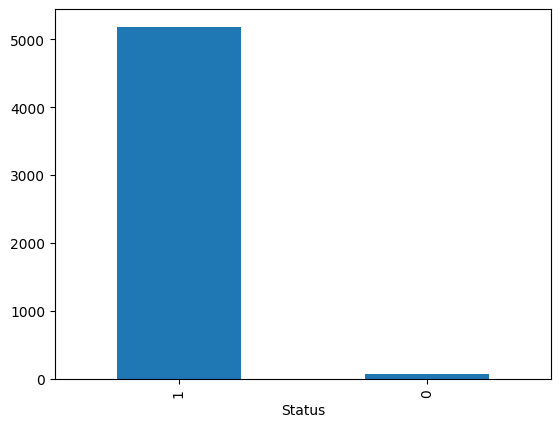

In [77]:
data[target].value_counts().plot(kind='bar')

>  1. **(a) (5) First, identify your predictor and target variables. Create `X`, which contains all predictor variables. Create `y`, which contains the target variable.**

In [78]:
y = data[target]
X = data[ords + nums]

>  1. **(b) (5) Next you will create the train and test sets from the `X` and `y` objects. For classification problems, it is important to preserve the distribution of the target variable in the training and testing sets. View the documentation for the `train_test_split` function and modify the necessary function argument to do this.  Use a 80/20 train/test split and a random state of 123.**

In [79]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=123)




---



>  2. **(10) Next, set up a preprocessing pipeline to prepare the data for analysis.**

In [80]:
nums_trans = Pipeline(steps = [('imputer_nums', SimpleImputer(strategy = 'median'))])

In [81]:
# Get all categories from the full dataset
noms_trans = Pipeline(steps=[
    ("imputer_cats", SimpleImputer(strategy="most_frequent")),
    ("encoder_nom", OneHotEncoder(sparse_output=False, drop="if_binary", handle_unknown="ignore"))
])

In [82]:
np.unique(train_X[ords])

array(['A', 'AA', 'B', 'C', 'D', 'E', 'HR', 'NC'], dtype=object)

In [83]:
ords_list = [['HR', 'AA', 'A', 'B', 'C', 'D', 'E', 'NC']] # Corrected order of ordinal categories
ords_trans = Pipeline (steps=[
    ("imputer_ords", SimpleImputer(strategy="most_frequent")),
    ("encoder_ords", OrdinalEncoder(categories= ords_list))])

In [84]:
pp = ColumnTransformer(transformers = [("numerical", nums_trans, nums),
                ("ordinal", ords_trans, ords)], verbose_feature_names_out= False)



---



>  3. **(a) (10) First, you will tune a Decision Tree model to identify the optimal `max_depth` and `min_sample_split` values. Consider maximum depth values from 2-5 and minimum sample split values from 2-10. Instantiate the Pipeline and grid for the grid search and output your search grid. If class imbalance is present, use class weights to address it. Use a random state of 123.**

In [85]:
pipe = Pipeline (steps =  [("preprocess", pp),
        ("DT", DecisionTreeClassifier(random_state=123, class_weight= 'balanced'))]) #Decision Tree

In [86]:
min_d = 2   # minimum max_depth to consider
max_d = 5  # maximum max_depth to consider

# define search space
param_grid = {
    'DT__max_depth': list(range(2, 6)),           # 2-5
    'DT__min_samples_split': list(range(2, 11))   # 2-10
}
         # min_samples_split option

print(param_grid)


{'DT__max_depth': [2, 3, 4, 5], 'DT__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}


>  3. **(b) (10) Next, perform the grid search using 5-Fold Cross validation. Use accuracy to choose the best model.**

In [87]:
#Define grid search
grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer_nums',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Debt.To.Income.Ratio',
                                                                          'Borrower.Rate',
                                                                          'Age',
                                                                          'Amount']),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('imputer_ords',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder_ords',
                                                                                          OrdinalEncoder(categories=[['HR',
                                                                                                                      'AA',
                                                                                                                      'A',
                                                                                                                      'B',
                                                                                                                      'C',
                                                                                                                      'D',
                                                                                                                      'E',
                                                                                                                      'NC']]))]),
                                                                         ['Credit.Grade'])],
                                                          verbose_feature_names_out=False)),
                                       ('DT',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=123))]),
             param_grid={'DT__max_depth': [2, 3, 4, 5],
                         'DT__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

>  3. **(c) (5) Output the optimal values of `max_depth` and `min_samples_split` and the corresponding training accuracy.**




In [88]:
md_val = grid.best_params_['DT__max_depth']#save best value
ms_val = grid.best_params_['DT__min_samples_split'] #save best value
print("optimal max_depth:", md_val) #output optimal max depth value
print("optimal min_samples_split:", ms_val)#output best minval
print("Corresponding CV Accuracy:", grid.best_score_) # output best score

optimal max_depth: 5
optimal min_samples_split: 2
Corresponding CV Accuracy: 0.876890987711157


<hr>

>  4. **(10) Output variable importance for the model. What is the most important variable in predicting if a customer will default?**

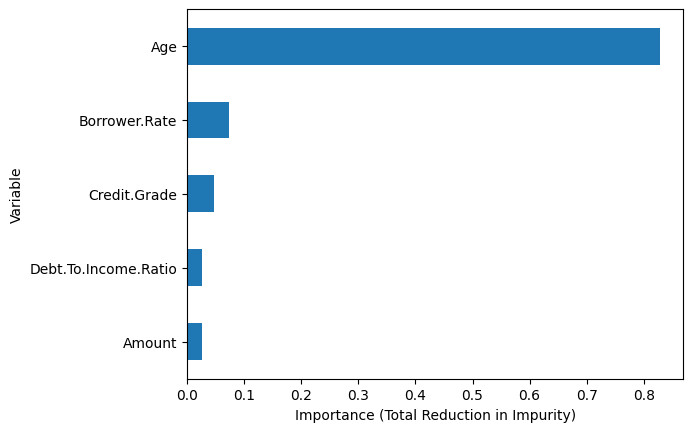

In [89]:
# Create dataframe for variable importance
dtt_imp = pd.DataFrame({
    'Feature': grid.best_estimator_.named_steps['preprocess'].get_feature_names_out(),
    'Importance': grid.best_estimator_['DT'].feature_importances_
})

# Sort by importance
dtt_imp = dtt_imp.sort_values('Importance')

# Plot variable importance
dtt_imp.plot.barh(x='Feature', y='Importance',
                  xlabel='Importance (Total Reduction in Impurity)',
                  ylabel='Variable', legend=False)
plt.show()



Based on the variable importance plot, Age is the most important predictor of whether a customer will default. It has a feature importance score above 0.8, far higher than any other variable. This indicates that Age played the largest role in reducing impurity during tree construction, making it the dominant factor in the model. Other features, such as Borrower Rate, Credit Grade, Debt-to-Income Ratio, and Loan Amount, contributed much less to the prediction



---



>  5. **(a) (10) Next, you will tune a Random Forest model to identify the optimal number of trees. Consider sizes of 50, 100, 150, 200, and 250. Instantiate the Pipeline and grid for the grid search and output the search grid. If class imbalance is present, use class weights to address it. Use a random state of 123.**

In [90]:
rf_param_grid = {'RF__n_estimators': [50, 100, 150, 200, 250]}

In [91]:
# Step 1: Instantiate the Random Forest classifier
Rf = RandomForestClassifier(class_weight='balanced', random_state=123)

# Create a pipeline that includes preprocessing and the Random Forest classifier
pipe_rf = Pipeline(steps=[('preprocess', pp), ('RF', Rf)])

clf_rf = GridSearchCV(pipe_rf,rf_param_grid, scoring='accuracy')


>  5. **(b) (10) Perform the grid search using 5-Fold Cross validation. Use accuracy to choose the best model.**

In [92]:
# Define grid search for Random Forest
clf_rf = GridSearchCV(pipe_rf, rf_param_grid, cv=5, scoring='accuracy')

# Fit grid search
clf_rf.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer_nums',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Debt.To.Income.Ratio',
                                                                          'Borrower.Rate',
                                                                          'Age',
                                                                          'Amount']),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('imputer_ords',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder_ords',
                                                                                          OrdinalEncoder(categories=[['HR',
                                                                                                                      'AA',
                                                                                                                      'A',
                                                                                                                      'B',
                                                                                                                      'C',
                                                                                                                      'D',
                                                                                                                      'E',
                                                                                                                      'NC']]))]),
                                                                         ['Credit.Grade'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=123))]),
             param_grid={'RF__n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy')

>  5. **(c) (5) Output the optimal number of trees and the corresponding training accuracy.**

In [93]:
# Output the best parameters and CV score
print("Best Random Forest Model")
print("Optimal number of trees (n_estimators):", clf_rf.best_params_['RF__n_estimators'])
print("Corresponding CV Accuracy:", clf_rf.best_score_)


Best Random Forest Model
Optimal number of trees (n_estimators): 50
Corresponding CV Accuracy: 0.9855044752175471




---



>  6. **(a) (5) Obtain test set predictions for your tuned Decision Tree and Random Forest classification models.**

In [94]:
rf_test_pred = clf_rf.predict(test_X)
dt_test_pred = grid.predict(test_X)

>  6. **(b) (5) Output the classification reports for the two models. Be sure to label the output by model.**

In [95]:
print("Random Forest Classification Report:")
print(classification_report(test_y, rf_test_pred))

print("\nDecision Tree Classification Report:")
print(classification_report(test_y, dt_test_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.17      0.24        12
           1       0.99      1.00      0.99      1041

    accuracy                           0.99      1053
   macro avg       0.70      0.58      0.61      1053
weighted avg       0.98      0.99      0.99      1053


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.83      0.18        12
           1       1.00      0.92      0.96      1041

    accuracy                           0.92      1053
   macro avg       0.55      0.87      0.57      1053
weighted avg       0.99      0.92      0.95      1053



>  6. **(c) (10) Based on your output, which model would you recommend Santander use to predict loan defaults. Why? Explain.**

The Random Forest model performed much better than the Decision Tree. It achieved about 99% accuracy, with very high precision, recall, and F1-scores, especially for default cases (class 1). This means it correctly identified almost all defaults and made very few mistakes.

The Decision Tree, on the other hand, only reached 92% accuracy and missed more default cases. It also struggled with the minority class (non-defaults), showing very low precision, which makes its predictions less reliable.

Recommendation:
I recommend Random Forest because it is more accurate, stable, and less prone to overfitting than a single Decision Tree. Its ensemble approach makes it more dependable for predicting loan defaults in real-world situations.